In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# PASTA ONDE ESTA OS CSVS, por padrão no Colab ele deixa na pasta raiz
csv_folder = "./"
# Nome do CSV, lembrando que a maneira como funciona é deixar a primeira coluna do CSV para os valores de X e a segunda para os valores de Y


# Caso não queira passar algum valor pro CSV favor deixar em branco e passar algum valor no -> list_x e list_y
csv_name = ""

if csv_name == "":
  dataframe = None
# Colocar nesta Lista os valores de X
  list_x = [0,1,2,3,4]
# Colocar nesta lista os valores de Y
  list_y = [70,57.8,48.9,42.2,37.5]
else:
  dataframe = pd.read_csv(csv_folder+csv_name+".csv")

In [3]:
def divided_differences(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table

def calculate_value(x, y, value, table):
    table = divided_differences(x, y)
    n = len(x)

    coeffs = table[0, :]

    result = coeffs[0]
    product = 1.0
    for i in range(1, n):
        product *= (value - x[i - 1])
        result += coeffs[i] * product

    return result

In [4]:
if dataframe is not None:
  print(dataframe.columns.to_list())


# Caso tenha mais colunas, aqui é possivel alterar qual delas ele vai utilizar para o X e qual para o Y
column_x = "tempo"
column_y = "distancia"

In [5]:
if dataframe is not None:
  print(dataframe)

# lista de elementos X
if dataframe is not None:
  list_x = dataframe[column_x].to_list()
# lista de elementos Y
if dataframe is not None:
  list_y = dataframe[column_y].to_list()

In [6]:
table = divided_differences(list_x, list_y)

# ESCOLHA UM VALOR A SER INTERPOLADO
value = 0

print(f"Valor Interpolado de X = {value} => Y = {calculate_value(list_x, list_y, value, table)}")

Valor Interpolado de X = 0 => Y = 70.0


<Axes: >

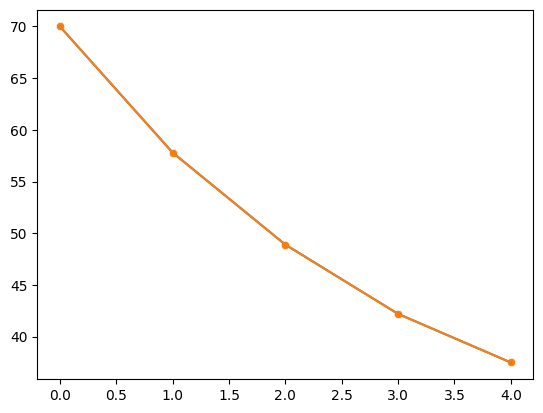

In [7]:
# Interpolandoooo todos os valores
table = divided_differences(list_x, list_y)
interpolated_y_list = []
for value in list_x:
    interpolated_value = calculate_value(list_x, list_y, value,table)
    interpolated_y_list.append(interpolated_value)

# Visualizando o gráfico com os dados atuais e os dados Interpolados pela Formula
sns.scatterplot(x=list_x, y=list_y)
sns.lineplot(x=list_x, y=list_y)

sns.scatterplot(x=list_x, y=interpolated_y_list)
sns.lineplot(x=list_x, y=interpolated_y_list)

10


<Axes: >

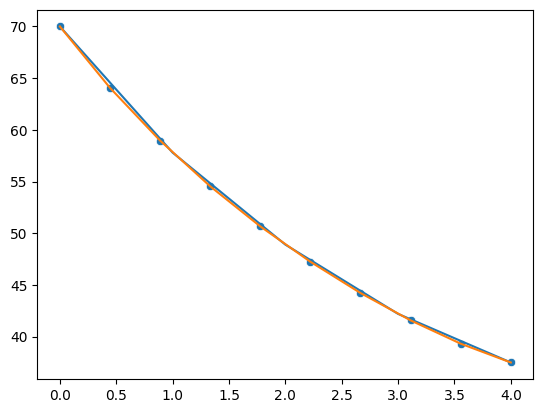

In [22]:
# sns.scatterplot(x=list_x, y=list_y)
sns.lineplot(x=list_x, y=list_y)


interpolated_list = []

quantity_of_values = 10

x_values = np.linspace(list_x[0],list_x[-1], quantity_of_values)

for i in x_values:
    p = calculate_value(list_x, list_y, i, table)
    interpolated_list.append(p)
print(len(x_values))
sns.scatterplot(x=x_values, y=interpolated_list)
sns.lineplot(x=x_values, y=interpolated_list)